In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("../input/cryptocurrency-market-history-coinmarketcap/all_currencies.csv",parse_dates=["Date"], index_col="Date")
df.head(5)

,Unnamed: 0,Symbol,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,,
2015-11-12,0,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
2015-11-13,1,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2015-11-14,2,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
2015-11-15,3,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
2015-11-16,4,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN


In [43]:
df.index

DatetimeIndex(['2015-11-12', '2015-11-13', '2015-11-14', '2015-11-15',
               '2015-11-16', '2015-11-17', '2015-11-18', '2015-11-19',
               '2015-11-20', '2015-11-21',
               ...
               '2018-09-16', '2018-09-17', '2018-09-18', '2018-09-19',
               '2018-09-22', '2018-09-23', '2018-09-24', '2018-09-25',
               '2018-09-26', '2018-09-27'],
              dtype='datetime64[ns]', name='Date', length=632218, freq=None)

In [68]:
df.describe()

,Unnamed: 0,Open,High,Low,Close,Volume,Market Cap
count,632218.000000,6.322180e+05,6.322180e+05,6.322180e+05,6.322180e+05,6.268830e+05,5.678410e+05
mean,572.071192,2.030191e+02,2.442086e+02,1.636501e+02,2.011948e+02,9.471200e+06,2.484729e+08
std,441.700977,8.820248e+03,1.157252e+04,6.428827e+03,8.707400e+03,2.077056e+08,4.454570e+09
min,0.000000,2.500000e-09,3.200000e-09,2.300000e-09,2.500000e-09,0.000000e+00,0.000000e+00
25%,206.000000,7.900000e-04,9.190000e-04,6.880000e-04,7.900000e-04,5.400000e+01,3.786400e+04
50%,464.000000,9.589500e-03,1.098000e-02,8.461000e-03,9.583000e-03,7.230000e+02,2.532080e+05
75%,868.000000,1.186272e-01,1.337490e-01,1.060337e-01,1.185665e-01,1.550250e+04,2.454240e+06
max,1978.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.261413e+11


In [69]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 632218 entries, 2015-11-12 to 2018-09-27
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  632218 non-null  int64  
 1   Symbol      632218 non-null  object 
 2   Open        632218 non-null  float64
 3   High        632218 non-null  float64
 4   Low         632218 non-null  float64
 5   Close       632218 non-null  float64
 6   Volume      626883 non-null  float64
 7   Market Cap  567841 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 43.4+ MB


((632218, 8), None)

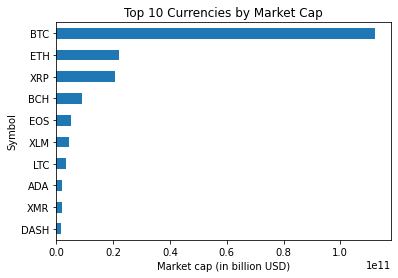

In [46]:
ax = df.groupby(['Symbol'])['Market Cap'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Market cap (in billion USD)");
plt.title("Top 10 Currencies by Market Cap");

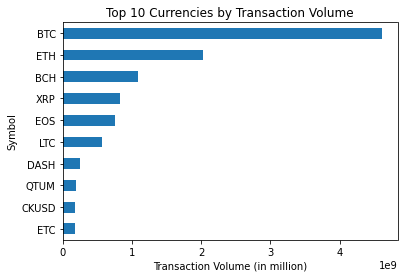

In [47]:
ax = df.groupby(['Symbol'])['Volume'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Transaction Volume (in million)");
plt.title("Top 10 Currencies by Transaction Volume");

In [48]:
top_5_currency_names = df.groupby(['Symbol'])['Market Cap'].last().sort_values(ascending=False).head(5).index
data_top_5_currencies = df[df['Symbol'].isin(top_5_currency_names)]
data_top_5_currencies.head(5)

,Unnamed: 0,Symbol,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,,
2017-07-23,0,BCH,555.89,578.97,411.78,413.06,85013.0,NaN
2017-07-24,1,BCH,412.58,578.89,409.21,440.70,190952.0,NaN
2017-07-25,2,BCH,441.35,541.66,338.09,406.90,524908.0,NaN
2017-07-26,3,BCH,407.08,486.16,321.79,365.82,1784640.0,NaN
2017-07-27,4,BCH,417.10,460.97,367.78,385.48,533207.0,NaN


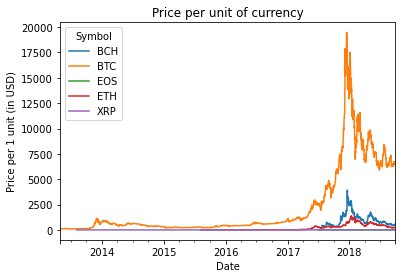

In [49]:
ax = data_top_5_currencies.groupby(['Date', 'Symbol'])['Close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency");

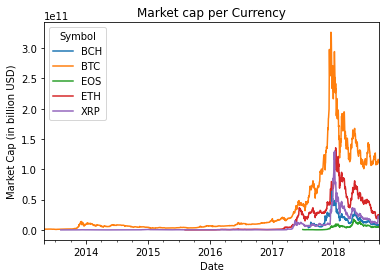

In [50]:
ax = data_top_5_currencies.groupby(['Date', 'Symbol'])['Market Cap'].mean().unstack().plot();
ax.set_ylabel("Market Cap (in billion USD)");
plt.title("Market cap per Currency");

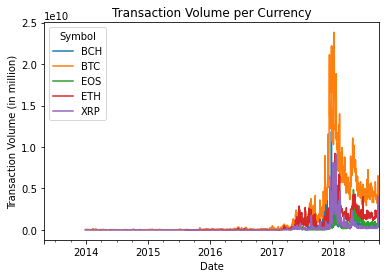

In [51]:
ax = data_top_5_currencies.groupby(['Date', 'Symbol'])['Volume'].mean().unstack().plot();
ax.set_ylabel("Transaction Volume (in million)");
plt.title("Transaction Volume per Currency");

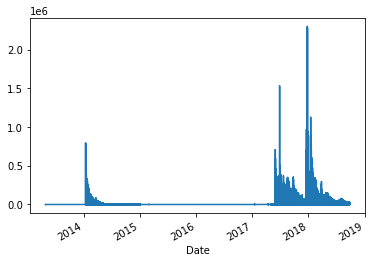

In [52]:
%matplotlib inline
df['Close'].plot()

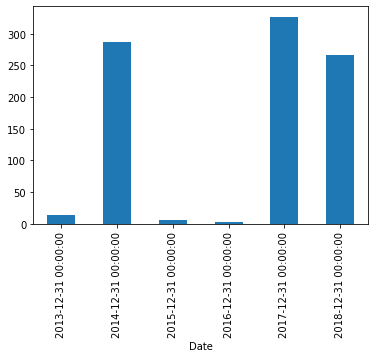

In [53]:
df['Close'].resample('Y').mean().plot(kind='bar')

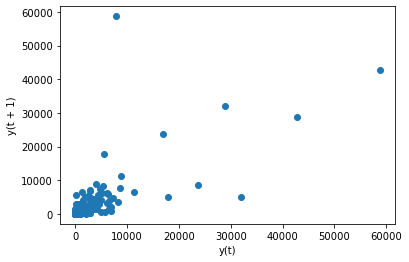

In [54]:
from pandas.plotting import lag_plot

lag_plot(df['Volume'].tail(250))

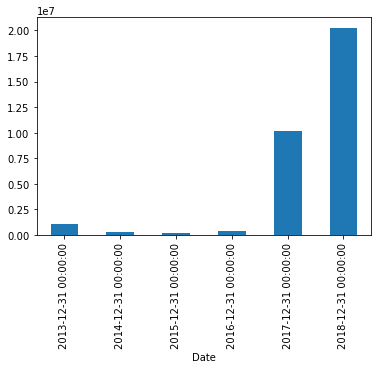

In [55]:
df['Volume'].resample('Y').mean().plot.bar()

In [56]:
df_BTC = df.loc[df['Symbol'] == 'BTC',['Close']]
df_BTC.shape

(1979, 1)

In [57]:
train = df_BTC[:'2018'].values
valid = df_BTC['2018':].values

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_BTC)

In [59]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [61]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [62]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=2, batch_size=1, verbose=1)

Epoch 1/2
1919/1919 [==============================] - 46s 24ms/step - loss: 0.0016
Epoch 2/2
1919/1919 [==============================] - 42s 22ms/step - loss: 7.0725e-04


In [63]:
inputs = df_BTC[len(df_BTC) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [64]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [65]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [66]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

899.1010578551302

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


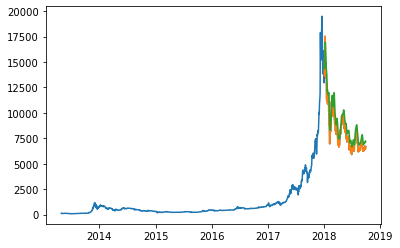

In [67]:
train = df_BTC[:'2018']
valid = df_BTC['2018':]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])